In [1]:
!pip install pydotplus
!pip install graphviz

You should consider upgrading via the 'C:\Users\min22\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\min22\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv("data/weather.csv")
print(df.shape)
df.head()

(366, 22)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29.0,1019.7,1015.0,7.0,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,NaN,9.7,ENE,39.0,E,W,4.0,...,36.0,1012.4,1008.4,NaN,3,17.5,25.7,Yes,3.6,Yes
2,13.7,NaN,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69.0,1009.5,1007.2,8.0,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56.0,1005.5,1007.0,2.0,7,NaN,14.1,Yes,2.8,Yes
4,NaN,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49.0,1018.3,1018.5,7.0,7,11.1,15.4,Yes,0.0,No


In [4]:
#결측값 확인하기
df.isnull().sum()

MinTemp           1
MaxTemp           3
Rainfall          1
Evaporation       1
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      2
Humidity9am       0
Humidity3pm       1
Pressure9am       0
Pressure3pm       1
Cloud9am          1
Cloud3pm          0
Temp9am           1
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [5]:
#온도, 바람의 방향, 풍속 제거
df=df.drop(['MinTemp', 'MaxTemp', 'RISK_MM','WindDir9am',
            'WindDir3pm','WindSpeed9am','WindSpeed3pm',
            'Temp9am','Temp3pm','WindGustDir',
           'WindGustSpeed'], axis=1)

In [6]:
df["RainToday"]=df.RainToday.map({"Yes":1,"No":0})
df["RainTomorrow"]=df.RainTomorrow.map({"Yes":1,"No":0})

In [7]:
df.isnull().sum()

Rainfall        1
Evaporation     1
Sunshine        3
Humidity9am     0
Humidity3pm     1
Pressure9am     0
Pressure3pm     1
Cloud9am        1
Cloud3pm        0
RainToday       0
RainTomorrow    0
dtype: int64

In [8]:
#중간값으로 결측값 채우기
df.Rainfall.fillna(df.Rainfall.median(), inplace=True)
df.Evaporation.fillna(df.Evaporation.median(), inplace=True)
df.Sunshine.fillna(df.Sunshine.median(), inplace=True)
df.Pressure3pm.fillna(df.Pressure3pm.median(), inplace=True)
df.Cloud9am.fillna(df.Cloud9am.median(), inplace=True)
df.Humidity3pm.fillna(df.Humidity3pm.median(), inplace=True)

In [9]:
df.isnull().sum()

Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
RainToday       0
RainTomorrow    0
dtype: int64

In [10]:
df

,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.0,3.4,6.3,68,29.0,1019.7,1015.0,7.0,7,0,1
1,3.6,4.2,9.7,80,36.0,1012.4,1008.4,3.0,3,1,1
2,3.6,5.8,3.3,82,69.0,1009.5,1007.2,8.0,7,1,1
3,39.8,7.2,9.1,62,56.0,1005.5,1007.0,2.0,7,1,1
4,2.8,5.6,10.6,68,49.0,1018.3,1018.5,7.0,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...
361,0.0,7.6,12.1,38,15.0,1016.1,1010.8,1.0,3,0,0
362,0.0,11.6,12.7,45,22.0,1020.0,1016.9,0.0,1,0,0
363,0.0,8.4,5.3,63,47.0,1024.0,1022.8,3.0,2,0,0
364,0.0,5.0,7.1,69,39.0,1021.0,1016.2,6.0,7,0,0


In [11]:
X=df.drop('RainTomorrow', axis=1)
y=np.array(df['RainTomorrow'])

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print("X_train 크기 :",X_train.shape)
print("y_train 크기 :",y_train.shape)
print("X_test 크기 :",X_test.shape)
print("y_test 크기 :",y_test.shape)

X_train 크기 : (274, 10)
y_train 크기 : (274,)
X_test 크기 : (92, 10)
y_test 크기 : (92,)


In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0, max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [14]:
temp_y_pred = tree.predict(X_test)

print(">예측값\n",temp_y_pred)
print(">실제값\n",y_test)

>예측값
 [0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1]
>실제값
 [0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0]


In [15]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
temp_acc = accuracy_score(y_test, temp_y_pred)
print("정확도 : ", format(temp_acc))

정확도 :  0.7934782608695652


In [16]:
train_scores, test_scores = list(), list()
#train_score와 test_score의 정확도를 저장 장소
#train_score는 훈련데이터에 특화될수록 증가
#test_score는 테스트데이터에 일반화될수록 증가

#의사결정나무 모델의 depth 조절(1부터 19까지)
for i in range(1,20):
    DT1 = DecisionTreeClassifier(max_depth=i)
    #깊이를 증가시키면서 의사결정나무 모델 적합
    DT1.fit(X_train, y_train)
    
    #training dataset 정확도 평가
    train_att = DT1.predict(X_train)
    train_acc = accuracy_score(y_train, train_att)
    train_scores.append(train_acc)
    
    #test dataset 정확도 평가
    test_att = DT1.predict(X_test)
    test_acc = accuracy_score(y_test, test_att)
    test_scores.append(test_acc)
    
    #train 정확도와 test 정확도를 depth 개수에 따른 정확도 확인
    print('>%d, train:%.3f, test:%.3f' %(i,train_acc, test_acc))

>1, train:0.843, test:0.750
>2, train:0.909, test:0.761
>3, train:0.916, test:0.793
>4, train:0.938, test:0.772
>5, train:0.960, test:0.707
>6, train:0.974, test:0.717
>7, train:0.982, test:0.696
>8, train:0.989, test:0.761
>9, train:1.000, test:0.728
>10, train:1.000, test:0.707
>11, train:1.000, test:0.685
>12, train:1.000, test:0.717
>13, train:1.000, test:0.728
>14, train:1.000, test:0.707
>15, train:1.000, test:0.728
>16, train:1.000, test:0.685
>17, train:1.000, test:0.707
>18, train:1.000, test:0.674
>19, train:1.000, test:0.707


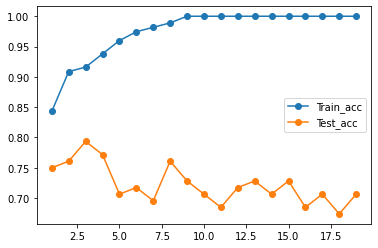

In [17]:
from matplotlib import pyplot

pyplot.plot(range(1,20), train_scores, '-o', label='Train_acc')
pyplot.plot(range(1,20), test_scores, '-o', label='Test_acc')
pyplot.legend()
pyplot.show()

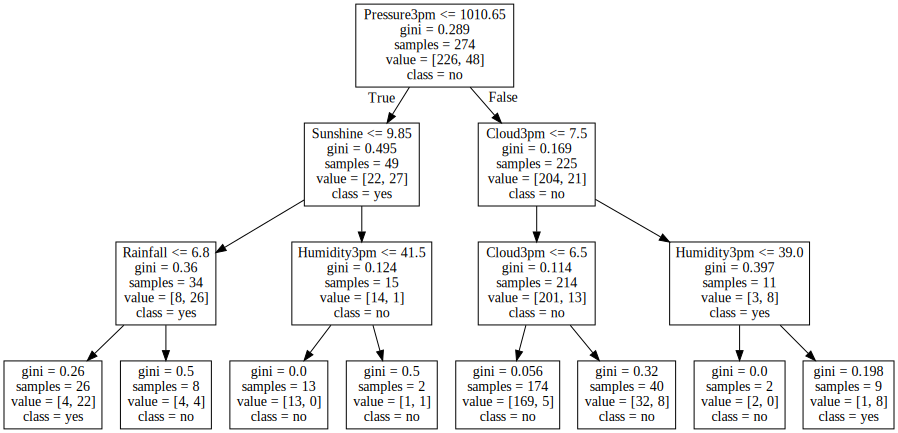

In [19]:
import graphviz
from sklearn.tree import export_graphviz

tree = DecisionTreeClassifier(random_state=0, max_depth=3) #n은 자신이 찾은 최적 깊이
tree.fit(X_train, y_train)

feature_name = ['Rainfall','Evaporation','Sunshine',
                'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm',
                'Cloud9am','Cloud3pm','RainToday' ]
tree = export_graphviz(tree, feature_names=feature_name, 
                       class_names=['no', 'yes'])
graphviz.Source(tree)